In [173]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from scipy.stats import *
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
import seaborn as sns
%matplotlib inline
import platform
from pandas import ExcelWriter


# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
from matplotlib import font_manager , rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')
    
#여러변수출력코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [186]:
df = pd.read_excel('성별_연도별_17-21.xls')
df

,성별,2017,2017.1,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2
0,성별,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수
1,합계,117,4,124,225,4,238,447,8,473,897,10,985,1735,19,1901
2,남,90,3,95,183,4,196,356,8,374,662,10,719,1254,16,1369
3,여,25,1,27,41,0,41,87,0,95,229,0,260,457,3,508
4,기타불명,2,0,2,1,0,1,4,0,4,6,0,6,24,0,24
5,출처)도로교통공단.&#10;주) 부상자수는 중상자수，경상자수，부상신고자수의 합계.&...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df.rename(columns=df.iloc[0],inplace=True)
df

,성별,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수
0,성별,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수
1,합계,117,4,124,225,4,238,447,8,473,897,10,985,1735,19,1901
2,남,90,3,95,183,4,196,356,8,374,662,10,719,1254,16,1369
3,여,25,1,27,41,0,41,87,0,95,229,0,260,457,3,508
4,기타불명,2,0,2,1,0,1,4,0,4,6,0,6,24,0,24
5,출처)도로교통공단.&#10;주) 부상자수는 중상자수，경상자수，부상신고자수의 합계.&...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df = df.set_index(['성별'])
df

,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수
성별,,,,,,,,,,,,,,,
성별,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수
합계,117,4,124,225,4,238,447,8,473,897,10,985,1735,19,1901
남,90,3,95,183,4,196,356,8,374,662,10,719,1254,16,1369
여,25,1,27,41,0,41,87,0,95,229,0,260,457,3,508
기타불명,2,0,2,1,0,1,4,0,4,6,0,6,24,0,24
출처)도로교통공단.&#10;주) 부상자수는 중상자수，경상자수，부상신고자수의 합계.&#10;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
df=df.transpose()
df

성별,성별,합계,남,여,기타불명,출처)도로교통공단.&#10;주) 부상자수는 중상자수，경상자수，부상신고자수의 합계.&#10;
사고건수,사고건수,117,90,25,2,NaN
사망자수,사망자수,4,3,1,0,NaN
부상자수,부상자수,124,95,27,2,NaN
사고건수,사고건수,225,183,41,1,NaN
사망자수,사망자수,4,4,0,0,NaN
부상자수,부상자수,238,196,41,1,NaN
사고건수,사고건수,447,356,87,4,NaN
사망자수,사망자수,8,8,0,0,NaN
부상자수,부상자수,473,374,95,4,NaN
사고건수,사고건수,897,662,229,6,NaN


In [190]:
df.drop(index='사고건수',inplace=True)
df

성별,성별,합계,남,여,기타불명,출처)도로교통공단.&#10;주) 부상자수는 중상자수，경상자수，부상신고자수의 합계.&#10;
사망자수,사망자수,4,3,1,0,NaN
부상자수,부상자수,124,95,27,2,NaN
사망자수,사망자수,4,4,0,0,NaN
부상자수,부상자수,238,196,41,1,NaN
사망자수,사망자수,8,8,0,0,NaN
부상자수,부상자수,473,374,95,4,NaN
사망자수,사망자수,10,10,0,0,NaN
부상자수,부상자수,985,719,260,6,NaN
사망자수,사망자수,19,16,3,0,NaN
부상자수,부상자수,1901,1369,508,24,NaN


In [191]:
df=df.transpose()
df

,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수
성별,,,,,,,,,,
성별,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수
합계,4,124,4,238,8,473,10,985,19,1901
남,3,95,4,196,8,374,10,719,16,1369
여,1,27,0,41,0,95,0,260,3,508
기타불명,0,2,0,1,0,4,0,6,0,24
출처)도로교통공단.&#10;주) 부상자수는 중상자수，경상자수，부상신고자수의 합계.&#10;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
df.drop(index='성별',inplace=True)
df
# 맨 위 합계만 지움

,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수
성별,,,,,,,,,,
합계,4,124,4,238,8,473,10,985,19,1901
남,3,95,4,196,8,374,10,719,16,1369
여,1,27,0,41,0,95,0,260,3,508
기타불명,0,2,0,1,0,4,0,6,0,24
출처)도로교통공단.&#10;주) 부상자수는 중상자수，경상자수，부상신고자수의 합계.&#10;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df.drop(index='합계',inplace=True)
df
# 맨 위 합계만 지움

,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수
성별,,,,,,,,,,
남,3,95,4,196,8,374,10,719,16,1369
여,1,27,0,41,0,95,0,260,3,508
기타불명,0,2,0,1,0,4,0,6,0,24
출처)도로교통공단.&#10;주) 부상자수는 중상자수，경상자수，부상신고자수의 합계.&#10;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
df =df.loc[['남','여']]
df

,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수,사망자수,부상자수
성별,,,,,,,,,,
남,3,95,4,196,8,374,10,719,16,1369
여,1,27,0,41,0,95,0,260,3,508


In [195]:
df.columns=['2017사망자수','2017부상자수','2018사망자수','2018부상자수','2019사망자수','2019부상자수','2020사망자수','2020부상자수','2021사망자수','2021부상자수',]
df

,2017사망자수,2017부상자수,2018사망자수,2018부상자수,2019사망자수,2019부상자수,2020사망자수,2020부상자수,2021사망자수,2021부상자수
성별,,,,,,,,,,
남,3,95,4,196,8,374,10,719,16,1369
여,1,27,0,41,0,95,0,260,3,508


In [200]:
df_M = df.loc['남']
df_M

2017사망자수       3
2017부상자수      95
2018사망자수       4
2018부상자수     196
2019사망자수       8
2019부상자수     374
2020사망자수      10
2020부상자수     719
2021사망자수      16
2021부상자수    1369
Name: 남, dtype: object

Text(0.5, 0, '년도별')

Text(0, 0.5, '사고건수')

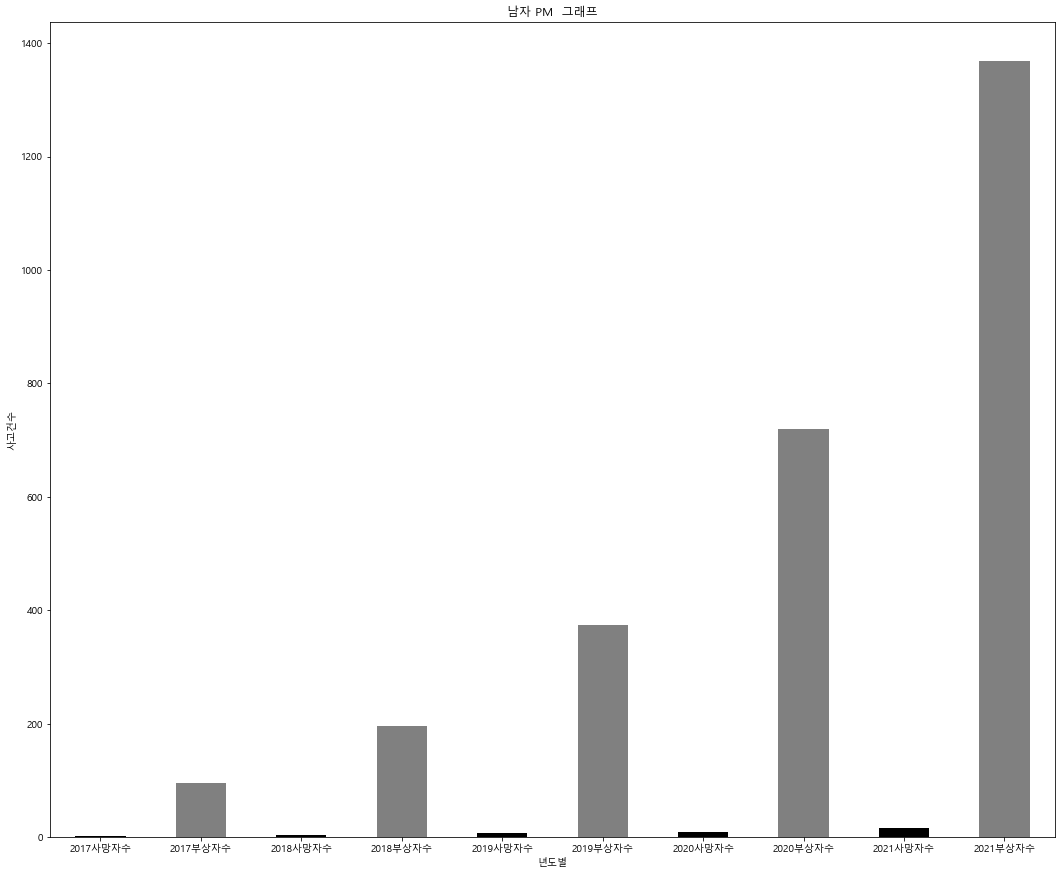

In [201]:
df_M.plot(
    figsize=(18,15),
    kind = 'bar',
    title = '남자 PM  그래프',
    rot = 0,
    color = ('black','gray'),
)
plt.xlabel('년도별')
plt.ylabel('사고건수')

In [202]:
df_F = df.loc['여']
df_F

2017사망자수      1
2017부상자수     27
2018사망자수      0
2018부상자수     41
2019사망자수      0
2019부상자수     95
2020사망자수      0
2020부상자수    260
2021사망자수      3
2021부상자수    508
Name: 여, dtype: object

Text(0.5, 0, '년도별')

Text(0, 0.5, '사고건수')

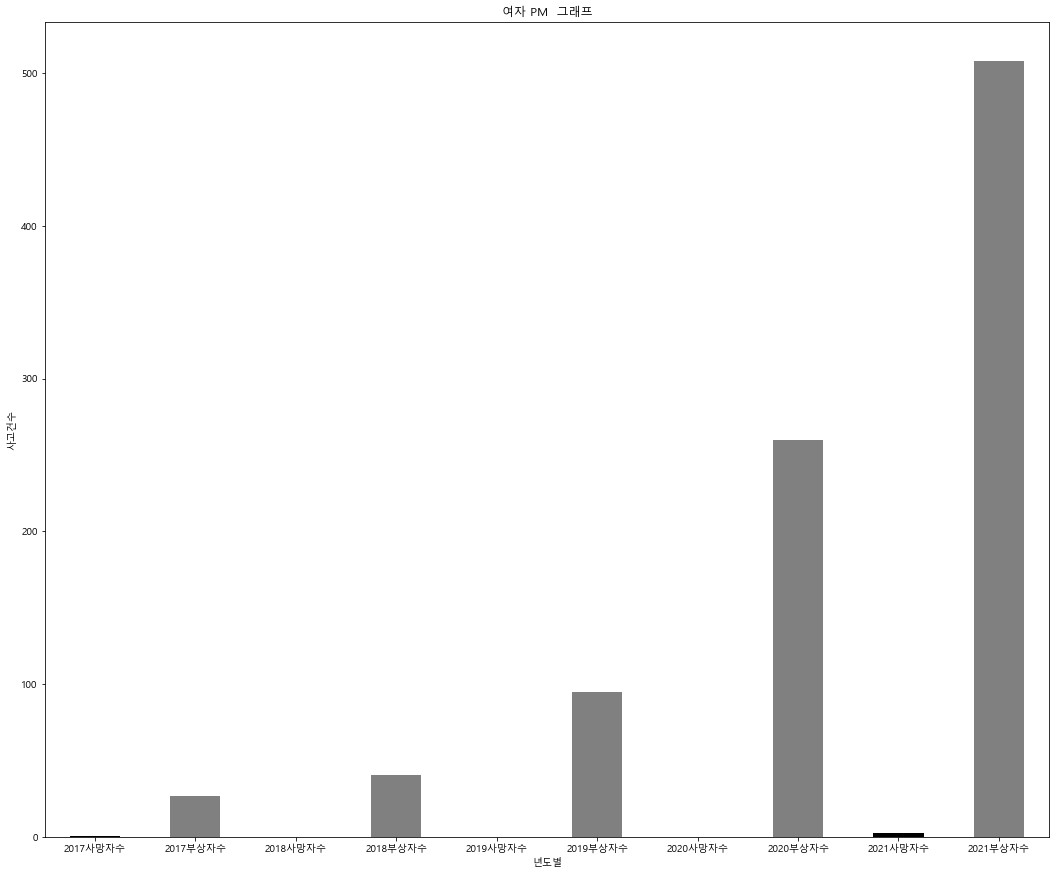

In [203]:
df_F.plot(
    figsize=(18,15),
    kind = 'bar',
    title = '여자 PM  그래프',
    rot = 0,
    color = ('black','gray'),
)
plt.xlabel('년도별')
plt.ylabel('사고건수')